In [1]:
import pandas as pd
import os
import dask.dataframe as dd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import scanpy as sc
import numpy as np
import seaborn as sns
from sanbomics.plots import volcano

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#pd.set_option("display.max_rows", None)
pd.options.mode.copy_on_write = True

In [65]:
all_counts_lusc = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\combined_stranded_lusc_matrix.csv")
all_counts_lusc.set_index("gene_id", inplace=True)

all_counts_luad = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\combined_stranded_luad_matrix.csv")
all_counts_luad.set_index("gene_id", inplace=True)

In [66]:
all_counts_luad = all_counts_luad.sort_index(axis=1)                    # bu üç kodda sample adlarımızı basitleştirdik(sadece reset_index yapsam daha mantıklıydı muhtemelen)
all_counts_luad.columns = all_counts_luad.columns.astype(str)           # tamamen boş olan genlerden kurtulduk burda
all_counts_luad = all_counts_luad[all_counts_luad.sum(axis = 1) > 0]    # verimizi işleme hazır hâle getirmek için transpose'unu alıyoruz

all_counts_lusc = all_counts_lusc.sort_index(axis=1)                    # bu üç kodda sample adlarımızı basitleştirdik(sadece reset_index yapsam daha mantıklıydı muhtemelen)
all_counts_lusc.columns = all_counts_lusc.columns.astype(str)           # tamamen boş olan genlerden kurtulduk burda
all_counts_lusc = all_counts_lusc[all_counts_lusc.sum(axis = 1) > 0]    # verimizi işleme hazır hâle getirmek için transpose'unu alıyoruz

In [67]:
all_counts_luad

,sample_1,sample_10,sample_100,sample_101,sample_102,sample_103,sample_104_control,sample_105,sample_106_control,sample_107_control,sample_108,sample_109,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118_control,sample_119_control,sample_11_control,sample_12,sample_120,sample_121,sample_122,sample_123,sample_124_control,sample_125,sample_126,sample_127,sample_128,sample_129_control,sample_13,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139_control,sample_14,sample_140,sample_141_control,sample_142,sample_143,...,sample_595,sample_596,sample_597,sample_598,sample_599_control,sample_6,sample_60,sample_600,sample_61,sample_62,sample_63,sample_64_control,sample_65,sample_66,sample_67,sample_68,sample_69,sample_7,sample_70,sample_71,sample_72_control,sample_73,sample_74,sample_75_control,sample_76,sample_77,sample_78,sample_79,sample_8,sample_80,sample_81,sample_82,sample_83,sample_84_control,sample_85,sample_86,sample_87,sample_88,sample_89,sample_9,sample_90,sample_91,sample_92_control,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0,2405,900,945,775,1426,961,1139,752,605,2253,1671,2594,346,463,1487,1962,935,1207,284,1836,2392,396,1172,400,4018,0,2977,1623,883,1279,3553,805,1800,1322,1946,1953,4251,1096,2309,621,2348,2077,2621,1899,2023,3656,1604,961,1,...,1981,1232,800,1317,1479,1729,752,382,0,4425,1855,1052,934,2579,4537,1980,3564,1176,472,1297,266,628,579,1507,1174,573,559,1284,1341,1053,1159,418,785,1912,2283,2223,2167,1782,723,4306,0,1684,1206,1588,663,513,609,3177,1203,1137
ENSG00000000005.6,16,2,1,0,68,1,2,0,1,2,0,5,1,54,0,0,1,3,0,1,1,0,1,2,2,27,2,0,0,0,1,0,0,97,4,0,3,1,0,0,0,0,0,0,5,0,2,0,0,10,...,1,7,0,0,1,9,0,4,16,0,9,0,3,0,1,2,1,0,0,0,1,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,157,0,1,41,1,0,1,0,0,0,0,1,0
ENSG00000000419.13,10,763,717,551,265,524,472,890,600,371,538,489,824,444,378,1128,1527,843,462,696,926,816,450,496,488,1563,11,1324,788,320,752,996,665,474,790,1450,900,1157,812,1331,1979,798,1298,624,827,1666,762,459,1045,22,...,1156,660,649,802,394,837,982,396,12,708,351,514,470,1377,2309,1234,566,721,649,377,344,203,790,729,848,256,619,1967,589,493,428,521,598,785,656,1034,1237,413,584,1137,50,1277,524,1010,696,595,679,1008,1365,1996
ENSG00000000457.14,247,1657,450,680,261,375,195,265,458,284,854,299,723,478,246,1216,1146,961,523,404,619,432,216,952,247,850,138,703,927,309,444,796,312,387,816,1441,963,1165,643,1323,314,657,1063,773,791,631,565,542,806,505,...,1205,673,526,597,619,670,544,423,328,914,347,603,371,898,844,1020,891,662,1045,417,305,210,577,725,667,124,846,898,551,321,955,722,472,628,807,1210,1729,574,381,864,447,558,488,538,289,361,802,552,708,1850
ENSG00000000460.17,414,924,225,530,175,263,197,210,445,111,348,187,604,295,146,825,1006,492,290,298,325,466,127,390,128,471,243,990,516,157,328,457,167,231,492,1223,681,902,474,791,271,515,997,584,432,610,423,324,475,247,...,841,533,280,486,375,492,492,224,313,531,167,323,316,967,862,471,365,537,608,246,143,87,384,406,426,101,724,409,384,181,478,365,355,401,929,631,1282,431,295,577,651,580,378,413,291,175,760,399,880,1304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288667.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288669.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [68]:
all_counts_lusc

,sample_1,sample_10,sample_100,sample_101_control,sample_102,sample_103,sample_104,sample_105,sample_106_control,sample_107,sample_108,sample_109,sample_11,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118,sample_119,sample_12,sample_120,sample_121_control,sample_122,sample_123,sample_124,sample_125,sample_126,sample_127,sample_128,sample_129,sample_13,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139,sample_14,sample_140,sample_141,sample_142,sample_143,...,sample_552,sample_553,sample_56_control,sample_57,sample_58_control,sample_59,sample_6,sample_60,sample_61,sample_62,sample_63,sample_64_control,sample_65,sample_66,sample_67,sample_68,sample_69,sample_7,sample_70,sample_71,sample_72,sample_73,sample_74,sample_75,sample_76,sample_77,sample_78,sample_79,sample_8,sample_80,sample_81,sample_82_control,sample_83_control,sample_84,sample_85_control,sample_86_control,sample_87_control,sample_88,sample_89,sample_9,sample_90,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,1050,738,671,864,1306,2243,570,646,997,513,446,2406,1576,1730,1219,1568,2098,1347,1301,979,1313,1531,1073,3271,1636,1225,1162,2052,876,1570,278,3037,622,1628,1311,1631,1941,1002,186,2754,1157,1272,1974,1241,4669,2449,1296,1324,1615,530,...,2479,1240,1107,2289,1694,1109,844,1706,324,1160,565,1178,2270,2317,2055,1335,475,2542,1767,3774,1310,932,1531,2039,736,3656,1508,1816,1500,2007,2621,1305,1514,1779,1546,8096,1697,1511,1264,1323,1852,5254,811,1062,1166,671,680,566,485,1857
ENSG00000000005.6,0,0,0,0,0,0,0,1,0,7,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,0,0,2,0,0,0,0,0,1,2,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,2,1,1,2,0,0,1,2,1,0,0,7,3,1,0,0,0,1,0,4,0,1
ENSG00000000419.13,905,701,753,793,3092,1355,713,753,342,303,358,1886,597,1034,1236,2101,1100,770,1878,1679,3782,1655,1246,1884,990,909,1663,1401,772,758,507,2495,711,1282,1519,1072,945,1183,1249,1226,1344,894,1244,537,2253,938,3575,1116,2880,995,...,1228,812,1470,981,499,902,786,1494,936,1193,332,890,1178,1547,1015,1221,259,829,963,2424,379,877,1475,1980,1580,2069,593,1003,1186,1051,1435,1163,1018,966,1436,4669,859,984,858,1139,1659,2158,861,1284,2072,679,690,701,493,1149
ENSG00000000457.14,342,190,638,273,1710,976,338,677,390,258,289,1143,351,579,706,1298,449,507,1225,1106,378,558,567,1517,518,807,750,898,587,665,268,772,636,803,568,852,521,270,892,2619,733,475,2872,430,914,641,586,765,783,386,...,542,601,993,612,475,836,402,1017,304,438,260,526,884,881,597,538,174,669,260,637,486,583,595,912,490,929,607,840,746,568,903,663,613,448,482,585,643,472,603,620,1226,1248,548,970,762,460,498,559,296,759
ENSG00000000460.17,264,193,365,291,1474,1093,240,326,323,212,275,577,255,777,518,1580,305,486,1141,1046,439,734,577,1337,546,435,630,735,291,614,200,767,473,743,432,804,503,275,442,2926,879,435,3135,446,914,638,637,661,916,501,...,434,632,1005,439,529,780,228,1127,240,430,148,340,988,895,518,592,168,796,310,756,539,540,513,1005,246,1016,583,707,674,535,792,459,337,416,391,502,547,506,669,750,928,1383,582,923,642,524,434,273,162,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288667.1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288669.1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0

In [69]:
# Örnek all_counts1 DataFrame'i (sütun isimleri)
columns_luad = all_counts_luad.columns
columns_lusc = all_counts_lusc.columns

# Yeni DataFrame oluşturma
metadata_luad = pd.DataFrame(columns_luad, columns=["Sample"])
metadata_luad.set_index("Sample", inplace=True)

metadata_lusc = pd.DataFrame(columns_lusc, columns=["Sample"])
metadata_lusc.set_index("Sample", inplace=True)

# Condition sütununu oluşturma
metadata_luad["Condition"] = metadata_luad.index.map(lambda x: "C" if "control" in x else "RS")
metadata_lusc["Condition"] = metadata_lusc.index.map(lambda x: "C" if "control" in x else "RS")

metadata_lusc, metadata_luad

(                   Condition
 Sample                      
 sample_1                  RS
 sample_10                 RS
 sample_100                RS
 sample_101_control         C
 sample_102                RS
 ...                      ...
 sample_95                 RS
 sample_96                 RS
 sample_97                 RS
 sample_98                 RS
 sample_99                 RS
 
 [553 rows x 1 columns],
            Condition
 Sample              
 sample_1          RS
 sample_10         RS
 sample_100        RS
 sample_101        RS
 sample_102        RS
 ...              ...
 sample_95         RS
 sample_96         RS
 sample_97         RS
 sample_98         RS
 sample_99         RS
 
 [600 rows x 1 columns])

In [70]:
# Silinecek satırların indekslerini rastgele seçme
num_to_drop = int(0.8 * metadata_lusc[metadata_lusc["Condition"] == 'RS'].shape[0])  # %80'i hesaplama
drop_indices = np.random.choice(metadata_lusc[metadata_lusc['Condition'] == 'RS'].index, size=num_to_drop, replace=False)

# Seçilen satırları silme
metadata_lusc.drop(index=drop_indices, inplace=True)

metadata_lusc

,Condition
Sample,
sample_101_control,C
sample_106_control,C
sample_109,RS
sample_12,RS
sample_120,RS
...,...
sample_85_control,C
sample_86_control,C
sample_87_control,C


In [71]:
all_counts_luad = all_counts_luad.T
all_counts_lusc = all_counts_lusc.T

In [72]:
all_counts_luad

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288601.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288631.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_1,0,16,10,247,414,0,3,28,3,4,66,8,30,7,1,37,10,5,4,92,72,20,16,1,17,3,9,7,0,8,30,1,55,0,2,9,12,0,1,105,603,95,8,629,18,0,761,216,2,7,...,0,0,0,15,0,0,0,63,5,0,0,26,0,2,1,2,143,2,0,0,0,0,0,0,0,1,31,1,0,0,0,0,0,0,6,0,2251,0,0,0,2,0,0,0,4,0,0,0,1,8
sample_10,2405,2,763,1657,924,760,596,1171,1405,1504,1095,4981,1630,1344,718,1537,1873,87,356,703,55,2262,2796,2191,1071,64,12,22,41,11904,737,553,2529,20,36,1886,1512,919,1343,5966,2405,432,4467,152,205,2997,3611,3570,4090,6520,...,0,0,1,1,0,0,0,20,18,0,0,0,1,0,153,3,54,7,0,0,0,20,2,0,6,3,174,0,0,0,0,0,0,1,2,120,0,0,0,0,11,0,13,0,72,0,0,209,9,85
sample_100,900,1,717,450,225,1920,3175,2175,603,699,400,1967,1129,1627,2175,1317,1263,101,155,176,2,1681,3704,5209,192,33,0,14,15,11631,925,2174,3511,93,106,671,588,788,1398,7001,7832,407,2063,256,1446,2778,1727,3514,12510,3547,...,0,2,1,0,0,0,0,3,15,0,0,0,3,0,41,4,70,0,0,0,0,26,0,0,0,1,20,0,0,0,0,0,0,0,0,0,5,0,1,0,23,0,0,0,8,0,0,145,7,16
sample_101,945,0,551,680,530,838,1072,1209,372,1812,312,1006,1206,238,1015,298,2053,49,140,102,35,954,3572,3471,383,41,6,5,22,12854,642,1213,1502,30,30,1659,1159,606,1029,6347,4329,511,2707,100,246,2144,852,3089,5621,3309,...,0,0,0,0,0,2,0,2,7,0,0,0,0,0,79,0,39,2,0,1,0,6,0,0,0,1,77,0,0,0,0,0,0,0,4,0,4,0,0,0,51,0,0,0,25,0,0,165,3,14
sample_102,775,68,265,261,175,255,1403,1028,950,414,201,640,758,544,342,4,776,29,72,104,24,945,792,4806,165,1423,3,49,10,7302,428,1596,1051,1,96,1098,558,379,640,3281,1124,239,1640,64,67,1244,1027,2759,3248,2787,...,0,1,0,0,0,0,0,1,9,1,0,0,0,0,35,4,36,0,0,0,0,4,2,0,0,10,25,0,0,1,0,0,0,0,1,13,6,0,0,0,22,0,0,0,12,0,0,69,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,513,0,595,361,175,2034,1420,1099,355,777,247,1173,593,1217,1652,699,1088,62,111,179,9,643,3124,3155,237,11,3,2,11,5091,574,

In [73]:
all_counts_lusc

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288577.1,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288627.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_1,1050,0,905,342,264,442,2231,1438,2014,393,293,911,1060,126,3788,918,1448,68,129,220,22,855,2505,2703,872,34,58,23,23,4988,377,447,4204,441,82,67,780,455,526,2417,1345,231,1161,49,102,1498,893,1955,3124,1906,...,1,0,0,0,0,0,1,0,25,5,0,0,0,0,0,53,1,39,0,0,0,3,0,0,3,242,63,0,0,0,1,0,0,0,0,0,0,0,0,0,55,0,1,0,7,0,0,48,0,15
sample_10,738,0,701,190,193,263,1936,1150,1840,485,137,367,600,67,1468,21,862,22,78,618,28,507,1792,1523,291,6,0,13,10,3415,353,436,1251,288,97,765,292,387,574,2091,1497,251,907,25,375,961,298,1468,1069,2026,...,1,0,0,0,1,0,1,0,3,8,0,0,0,0,0,45,0,23,0,0,0,5,0,0,2,2,8,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,15,0,2,38,3,7
sample_100,671,0,753,638,365,1953,2669,1812,526,666,353,1875,710,2299,970,1340,1459,78,178,162,1,824,5256,5420,136,22,0,3,24,5478,745,1083,2869,79,339,508,210,801,1171,7701,8688,435,1952,237,1032,1405,1070,2221,5128,2840,...,0,0,2,1,2,0,1,0,6,6,0,0,0,0,0,25,6,77,0,1,0,3,0,0,1,2,25,0,0,0,0,0,0,0,0,0,38,0,0,0,13,0,0,0,5,0,0,131,4,4
sample_101_control,864,0,793,273,291,196,1502,1010,479,720,244,1037,1221,107,2502,112,835,46,75,92,103,812,1815,2079,128,29,1,21,48,3650,349,637,1652,69,560,54,53,396,260,1755,796,242,909,73,195,1704,620,2707,1759,1785,...,1,1,3,0,0,0,1,0,1,1,0,0,0,0,0,21,72,34,0,0,0,6,0,0,0,29,15,0,0,0,0,0,0,1,1,0,2,0,0,0,3,0,0,0,4,0,0,54,1,14
sample_102,1306,0,3092,1710,1474,552,1862,2988,7343,3062,395,986,2860,398,2704,17,3043,243,364,827,57,1184,3596,6673,231,43,13,70,56,7194,1025,1031,4477,932,460,684,384,2479,623,5650,1664,1207,3554,147,210,3885,1645,5832,3444,3717,...,7,1,5,4,0,0,2,0,11,56,0,0,0,3,2,243,14,209,0,1,0,14,0,0,5,99,146,0,0,1,0,0,0,0,2,1,20,0,1,0,40,0,1,1,66,0,0,349,7,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,671,1,679,460,524,266,442,772,6825,627,228,488,1039,219,659,110,82

In [10]:
dds_luad = DeseqDataSet(counts=all_counts_luad, metadata=metadata_luad, design_factors="Condition")
dds_lusc = DeseqDataSet(counts=all_counts_lusc, metadata=metadata_lusc, design_factors="Condition")

dds_luad, dds_lusc

(AnnData object with n_obs × n_vars = 600 × 58179
     obs: 'Condition'
     obsm: 'design_matrix',
 AnnData object with n_obs × n_vars = 553 × 58457
     obs: 'Condition'
     obsm: 'design_matrix')

In [11]:
res_luad = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\res_luad_lfc_padj_gene_id.csv")
res_luad.set_index("gene_id", inplace=True)
res_lusc = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\res_lusc_lfc_padj_gene_id.csv")
res_lusc.set_index("gene_id", inplace=True)

In [74]:
# significant genlere göre filtreleme yapıyorum

sig_luad = res_luad[(res_luad["padj"] < 0.01) & (abs(res_luad["log2FoldChange"]) > 0.5) & (res_luad["baseMean"] > 10)]
sig_lusc = res_lusc[(res_lusc["padj"] < 0.01) & (abs(res_lusc["log2FoldChange"]) > 0.5) & (res_lusc["baseMean"] > 10)]

indexes_luad = sig_luad.index.tolist()
# all_counts_luad = all_counts_luad[indexes_luad]

indexes_lusc = sig_lusc.index.tolist()
# all_counts_lusc = all_counts_lusc[indexes_lusc]

res_indexes_luad = res_luad.index.tolist()
res_indexes_lusc = res_lusc.index.tolist()

dropped_indexes_lusc = metadata_lusc.index.tolist()

In [84]:
all_counts_lusc = all_counts_lusc.T
all_counts_lusc = all_counts_lusc[dropped_indexes_lusc]
all_counts_lusc = all_counts_lusc.T
all_counts_lusc

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288577.1,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288627.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_101_control,864,0,793,273,291,196,1502,1010,479,720,244,1037,1221,107,2502,112,835,46,75,92,103,812,1815,2079,128,29,1,21,48,3650,349,637,1652,69,560,54,53,396,260,1755,796,242,909,73,195,1704,620,2707,1759,1785,...,1,1,3,0,0,0,1,0,1,1,0,0,0,0,0,21,72,34,0,0,0,6,0,0,0,29,15,0,0,0,0,0,0,1,1,0,2,0,0,0,3,0,0,0,4,0,0,54,1,14
sample_106_control,997,0,342,390,323,264,643,1301,15922,821,572,844,830,131,1777,101,1226,81,149,157,4,996,1062,3922,161,37,3,28,3,4904,695,649,1876,820,129,172,218,590,400,2404,1017,496,1249,109,158,2154,573,3084,1684,2201,...,2,1,3,0,0,0,0,0,7,13,0,0,0,0,0,60,2,54,2,0,0,6,0,0,0,19,35,0,0,0,0,0,0,0,2,0,3,0,2,0,95,0,0,0,8,0,1,108,2,8
sample_109,2406,7,1886,1143,577,9725,4961,3208,3972,1958,1445,5952,2183,6287,3644,6879,3311,366,354,394,7,2085,7635,14083,1274,135,10,25,34,20927,1105,2565,10684,313,406,1552,604,2181,2540,22057,28909,994,4379,771,3874,5248,2932,5521,21047,7198,...,7,0,1,5,1,0,2,0,13,16,0,0,0,0,0,62,26,267,8,1,0,40,0,0,0,85,71,0,0,0,0,0,0,0,1,0,94,0,0,1,75,0,1,0,9,1,0,459,13,20
sample_12,3271,0,1884,1517,1337,322,1591,1174,6200,2141,656,1857,3895,237,4947,46,4199,163,462,662,180,3091,4182,9602,125,42,8,84,112,10219,1239,922,6746,1174,125,453,451,1658,1181,3580,915,1037,2488,292,1631,5159,1142,10163,2243,4096,...,5,0,1,0,0,0,0,0,1,29,0,0,0,0,23,103,20,121,3,1,0,4,0,0,5,0,71,0,0,0,0,0,0,0,1,0,13,0,1,10,53,0,0,0,40,0,0,275,5,41
sample_120,1636,0,990,518,546,991,1220,2114,9953,864,371,958,1469,360,1965,503,1538,138,80,233,28,947,2292,5356,332,489,6,32,15,7784,1167,3072,5122,573,61,426,757,570,470,1910,1930,675,887,168,543,2698,861,5293,4781,2669,...,4,0,1,3,0,0,2,0,6,14,0,0,0,0,0,14,0,41,2,0,0,7,0,0,3,204,52,0,0,0,0,0,0,0,1,0,3,0,1,0,19,0,1,0,4,1,0,60,3,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_85_control

----------------------------------MACHİNE LEARNİNG----------------------------------

In [7]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [14]:
#rows = 100
#head_luad = all_counts_luad.head(rows)
#tail_luad = all_counts_luad.tail(rows)
#head_and_tail = pd.concat([head_luad, tail_luad])
#
#head_luad_metadata = metadata_luad.head(rows)
#tail_luad_metadata = metadata_luad.tail(rows)
#head_and_tail_metadata = pd.concat([head_luad_metadata, tail_luad_metadata])
#head_and_tail, head_and_tail_metadata

In [15]:
X = all_counts_luad
y = metadata_luad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Light GBM

In [16]:
lgb = lgb.LGBMClassifier()
parameters = {'num_leaves':[300], 'min_child_samples':[15], 'max_depth':[20], 'learning_rate':[0.2], 'reg_alpha':[0.03]}
clf = GridSearchCV(lgb, parameters, cv = 2)
clf.fit(X=X_train, y=y_train)

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 206, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.261903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1684194
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 45855
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.858333 -> initscore=1.801516
[LightGBM] [Info] Start training from score 1.801516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 206, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.675397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1675337
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 46103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.858333 -> initscore=1.801516
[LightGBM] [Info] Start training from score 1.801516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 412, number of negative: 68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.064758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066688
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 49782
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.858333 -> initscore=1.801516
[LightGBM] [Info] Start training from score 1.801516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2], 'max_depth': [20],
                         'min_child_samples': [15], 'num_leaves': [300],
                         'reg_alpha': [0.03]})

In [17]:
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
a = pd.crosstab(y_test["Condition"], predictions)
print(score)
print(a.max(axis=1)/a.sum(axis=1))

0.8416666666666667
Condition
C     1.000000
RS    0.990196
dtype: float64


Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50,
                               random_state = 42)

model.fit(X_train, y_train)

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50, random_state=42)

In [20]:
model_predict = model.predict(X_test)
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, model_predict))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Decision Tree

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.7528089887640449, 0.9736842105263158, 'x[50036] <= 37.5\ngini = 0.246\nsamples = 600\nvalue = [86, 514]'),
 Text(0.7078651685393258, 0.9210526315789473, 'x[10079] <= 20.5\ngini = 0.235\nsamples = 595\nvalue = [81, 514]'),
 Text(0.5955056179775281, 0.868421052631579, 'x[7076] <= 28.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.550561797752809, 0.8157894736842105, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6404494382022472, 0.8157894736842105, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8202247191011236, 0.868421052631579, 'x[4926] <= 5779.5\ngini = 0.221\nsamples = 586\nvalue = [74, 512]'),
 Text(0.7303370786516854, 0.8157894736842105, 'x[25127] <= 16.0\ngini = 0.206\nsamples = 576\nvalue = [67, 509]'),
 Text(0.6853932584269663, 0.7631578947368421, 'x[16053] <= 2264.0\ngini = 0.196\nsamples = 572\nvalue = [63, 509]'),
 Text(0.6404494382022472, 0.7105263157894737, 'x[3914] <= 377.5\ngini = 0.186\nsamples = 568\nvalue = [59, 509]'),
 Text(0.4494382022471

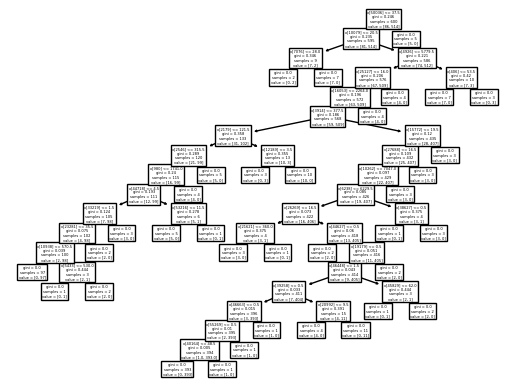

In [21]:
tree.plot_tree(clf)

logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='saga', random_state=0)
model.fit(X_train, y_train)

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='saga')

In [23]:
model.classes_


array(['C', 'RS'], dtype=object)

In [24]:
model.predict_proba(X_test)


array([[1.02913283e-01, 8.97086717e-01],
       [1.70756496e-02, 9.82924350e-01],
       [3.53673806e-02, 9.64632619e-01],
       [6.64327174e-02, 9.33567283e-01],
       [6.48893465e-02, 9.35110653e-01],
       [8.17529843e-03, 9.91824702e-01],
       [6.46579314e-02, 9.35342069e-01],
       [2.67303849e-04, 9.99732696e-01],
       [1.61634474e-01, 8.38365526e-01],
       [3.56223435e-01, 6.43776565e-01],
       [3.37324171e-02, 9.66267583e-01],
       [6.43709344e-02, 9.35629066e-01],
       [8.49516791e-02, 9.15048321e-01],
       [1.59761925e-01, 8.40238075e-01],
       [2.14802887e-01, 7.85197113e-01],
       [1.96194205e-02, 9.80380580e-01],
       [1.59521858e-01, 8.40478142e-01],
       [4.42698993e-01, 5.57301007e-01],
       [4.82544681e-02, 9.51745532e-01],
       [4.40635789e-01, 5.59364211e-01],
       [2.90842020e-01, 7.09157980e-01],
       [6.95011430e-02, 9.30498857e-01],
       [3.80109580e-01, 6.19890420e-01],
       [3.17711460e-01, 6.82288540e-01],
       [1.195860

In [25]:
model_predict = model.predict(X_test)


In [26]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.89375, 0.8333333333333334)

In [27]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00        18
          RS       0.85      0.98      0.91       102

    accuracy                           0.83       120
   macro avg       0.42      0.49      0.45       120
weighted avg       0.72      0.83      0.77       120



In [28]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,  18],
       [  2, 100]], dtype=int64)

Text(0.5, 20.049999999999997, 'Predicted label')

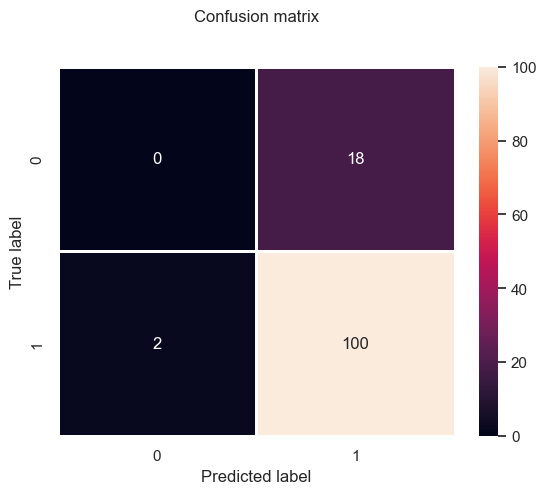

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=1)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

boruta

In [5]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy as sp
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from boruta import BorutaPy
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [31]:
X

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288601.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288631.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_1,0,16,10,247,414,0,3,28,3,4,66,8,30,7,1,37,10,5,4,92,72,20,16,1,17,3,9,7,0,8,30,1,55,0,2,9,12,0,1,105,603,95,8,629,18,0,761,216,2,7,...,0,0,0,15,0,0,0,63,5,0,0,26,0,2,1,2,143,2,0,0,0,0,0,0,0,1,31,1,0,0,0,0,0,0,6,0,2251,0,0,0,2,0,0,0,4,0,0,0,1,8
sample_10,2405,2,763,1657,924,760,596,1171,1405,1504,1095,4981,1630,1344,718,1537,1873,87,356,703,55,2262,2796,2191,1071,64,12,22,41,11904,737,553,2529,20,36,1886,1512,919,1343,5966,2405,432,4467,152,205,2997,3611,3570,4090,6520,...,0,0,1,1,0,0,0,20,18,0,0,0,1,0,153,3,54,7,0,0,0,20,2,0,6,3,174,0,0,0,0,0,0,1,2,120,0,0,0,0,11,0,13,0,72,0,0,209,9,85
sample_100,900,1,717,450,225,1920,3175,2175,603,699,400,1967,1129,1627,2175,1317,1263,101,155,176,2,1681,3704,5209,192,33,0,14,15,11631,925,2174,3511,93,106,671,588,788,1398,7001,7832,407,2063,256,1446,2778,1727,3514,12510,3547,...,0,2,1,0,0,0,0,3,15,0,0,0,3,0,41,4,70,0,0,0,0,26,0,0,0,1,20,0,0,0,0,0,0,0,0,0,5,0,1,0,23,0,0,0,8,0,0,145,7,16
sample_101,945,0,551,680,530,838,1072,1209,372,1812,312,1006,1206,238,1015,298,2053,49,140,102,35,954,3572,3471,383,41,6,5,22,12854,642,1213,1502,30,30,1659,1159,606,1029,6347,4329,511,2707,100,246,2144,852,3089,5621,3309,...,0,0,0,0,0,2,0,2,7,0,0,0,0,0,79,0,39,2,0,1,0,6,0,0,0,1,77,0,0,0,0,0,0,0,4,0,4,0,0,0,51,0,0,0,25,0,0,165,3,14
sample_102,775,68,265,261,175,255,1403,1028,950,414,201,640,758,544,342,4,776,29,72,104,24,945,792,4806,165,1423,3,49,10,7302,428,1596,1051,1,96,1098,558,379,640,3281,1124,239,1640,64,67,1244,1027,2759,3248,2787,...,0,1,0,0,0,0,0,1,9,1,0,0,0,0,35,4,36,0,0,0,0,4,2,0,0,10,25,0,0,1,0,0,0,0,1,13,6,0,0,0,22,0,0,0,12,0,0,69,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,513,0,595,361,175,2034,1420,1099,355,777,247,1173,593,1217,1652,699,1088,62,111,179,9,643,3124,3155,237,11,3,2,11,5091,574,

In [32]:
y

,Condition
Sample,
sample_1,RS
sample_10,RS
sample_100,RS
sample_101,RS
sample_102,RS
...,...
sample_95,RS
sample_96,RS
sample_97,RS


In [33]:
# boruta kodu bu, eğer çalıştırmak istiyorsan X'i sig_luad genlerine göre tekrar değiştir

# #all_counts_luad = all_counts_luad[indexes_luad]
# #all_counts_lusc = all_counts_lusc[indexes_lusc]
# #X = all_counts_luad

# # let's initialize a RF model
# model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
# 
# imputer = SimpleImputer(strategy="mean")
# X_imputed = imputer.fit_transform(X)
# 
# le = LabelEncoder()
# 
# # Encode the target variable y
# y_encoded = le.fit_transform(y)
# 
# # let's initialize Boruta
# feat_selector = BorutaPy(
#     verbose=2,
#     estimator=model,
#     n_estimators='auto',
#     max_iter=20,  #numero di iterazioni da fare
#     random_state=42,
# )
# 
# # train Boruta
# # N.B.: X and y must be numpy arrays
# feat_selector.fit(X_imputed, y_encoded)
# 
# # print support and ranking for each feature
# print("\n------Support and Ranking for each feature------\n")
# for i in range(len(feat_selector.support_)):
#     if feat_selector.support_[i]:
#         print("Passes the test: ", X.columns[i],
#               " - Ranking: ", feat_selector.ranking_[i], "✔️")
#     else:
#         print("Doesn't pass the test: ",
#               X.columns[i], " - Ranking: ", feat_selector.ranking_[i], "❌")
# #######################################################################################################################
# # features selected by Boruta
# X_filtered = feat_selector.transform(X_imputed)
# 
# print("\n------Selected Features------\n")
# print(X_filtered)
# 
# # train the model
# model.fit(X_filtered, y["Condition"])
# 
# # compute predictions
# predictions = model.predict(X_filtered)
# 
# # create a dataframe with real predictions and values
# df = pd.DataFrame({'pred': predictions, 'observed': y["Condition"]})
# 
# # let's print the dataframe
# print("\n------Predictions and real values------\n")
# print(df)
# 
# # compute RMSE
# mse = ((df['pred'] - df['observed']) ** 2).mean()
# rmse = np.sqrt(mse)
# print("\n------RMSE------\n", round(rmse, 3))

different models

In [2]:
df = pd.read_csv(r"C:\Users\Yusuf\Desktop\Pokemon.csv")
df.drop(columns=['#','Name',	'Type 1',	'Type 2'],inplace=True)

In [3]:
df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,True
796,700,50,160,110,160,110,110,6,True
797,600,80,110,60,150,130,70,6,True
798,680,80,160,60,170,130,80,6,True


In [8]:
#res_luad = res_luad.reset_index()
#res_luad = res_luad.drop(columns="gene_id")

X = df.drop(columns="Legendary") #all_counts_lusc[res_indexes_lusc] #
y = df["Legendary"] #metadata_lusc

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
 
le = LabelEncoder()

# Encode the target variable y
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train_array, X_test_array, y_train_array, y_test_array = train_test_split(X_imputed, y_encoded, test_size = 0.2)

In [9]:
X_train

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
703,580,79,100,80,110,90,121,5
469,325,76,48,48,57,62,34,4
781,335,44,66,70,44,55,56,6
9,314,44,48,65,50,64,43,1
468,450,70,60,70,87,78,85,4
...,...,...,...,...,...,...,...,...
127,320,45,67,60,35,50,63,1
395,300,50,50,50,50,50,50,3
599,465,75,125,75,30,75,85,5
596,384,75,65,55,65,55,69,5


In [10]:
y_train

703     True
469    False
781    False
9      False
468    False
       ...  
127    False
395    False
599    False
596    False
352    False
Name: Legendary, Length: 640, dtype: bool

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score we have achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score we have achieved using Logistic Regression is: 94.38 %


In [13]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)
print("The accuracy score we have achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score we have achieved using Naive Bayes is: 93.12 %


In [14]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print("The accuracy score we have achieved using Linear SVM is: " + str(score_svm)+" %")

The accuracy score we have achieved using Linear SVM is: 95.0 %


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
print("The accuracy score we have achieved using KNN is: "+str(score_knn)+" %")

The accuracy score we have achieved using KNN is: 95.62 %


In [93]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)
print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)
print("The accuracy score we have achieved using Decision Tree is: "+str(score_dt)+" %")

60.61
14
The accuracy score we have achieved using Decision Tree is: 60.61 %


In [16]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0

for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)
    
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)
print("The accuracy score we have achieved using Random Forest is: "+str(score_rf)+" %")

97.5
72
The accuracy score we have achieved using Random Forest is: 97.5 %


In [17]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_array, y_train_array)
Y_pred_xgb = xgb_model.predict(X_test_array)
score_xgb = round(accuracy_score(Y_pred_xgb,y_test_array)*100,2)
print("The accuracy score we have achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score we have achieved using XGBoost is: 95.0 %


In [21]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train_array, y_train_array, epochs=200, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))
Y_pred_nn = model.predict(X_test_array)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,y_test_array)*100,3)
print("The accuracy score we have achieved using Neural Network is: "+str(score_nn)+" %")
print(classification_report(y_test_array, Y_pred_nn))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9279 - loss: 15.9547   
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.9007 - loss: 11.9621
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8907 - loss: 2.2228
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.8686 - loss: 1.5038
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 1.2119 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8602 - loss: 1.1739
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8921 - loss: 0.8645
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8545 - loss: 0.8439
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8977 - loss: 0.7148 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8702 - loss: 0.7293
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8813 - loss: 0.6028 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [22]:
parameters = {'num_leaves':[200], 'min_child_samples':[18], 'max_depth':[25], 'learning_rate':[0.2], 'reg_alpha':[0.03], 'verbose':[-1]}
clf = GridSearchCV(lgb, parameters, cv = 2)
clf.fit(X=X_train, y=y_train)

predictions = clf.predict(X_test)
score = accuracy_score(y_test["Condition"], predictions)
a = pd.crosstab(y_test["Condition"], predictions)

print(score)
print(a.max(axis=1)/a.sum(axis=1))
print(classification_report(y_test, predictions))

InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got <module 'lightgbm' from 'C:\\Users\\Yusuf\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\lightgbm\\__init__.py'> instead.